In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
import json
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
image_folder = "/content/drive/MyDrive/Pedestrian_dataset_for_internship_assignment/Images/"
json_file_path = "/content/drive/MyDrive/Pedestrian_dataset_for_internship_assignment/random_sample_mavi_2_gt.json"

In [ ]:
# Load the JSON data
with open(json_file_path, 'r') as f:
    data = json.load(f)

In [ ]:
# Extract image filenames from the JSON data
image_filenames = [image['file_name'] for image in data['images']]


In [ ]:
# Split the image filenames into training and testing sets
train_filenames, test_filenames = train_test_split(image_filenames, test_size=0.2, random_state=42)

In [ ]:
train_dir = os.path.join(image_folder, "train")
test_dir = os.path.join(image_folder, "test")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [ ]:
train_count = len(os.listdir(train_dir))
test_count = len(os.listdir(test_dir))

In [ ]:
print("Number of training images:", train_count)
print("Number of testing images:", test_count)

Number of training images: 159
Number of testing images: 40


In [ ]:
# Load the COCO annotations
with open(json_file_path, 'r') as f:
    data = json.load(f)


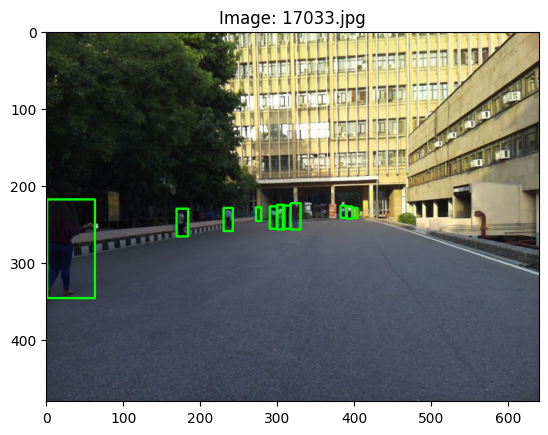

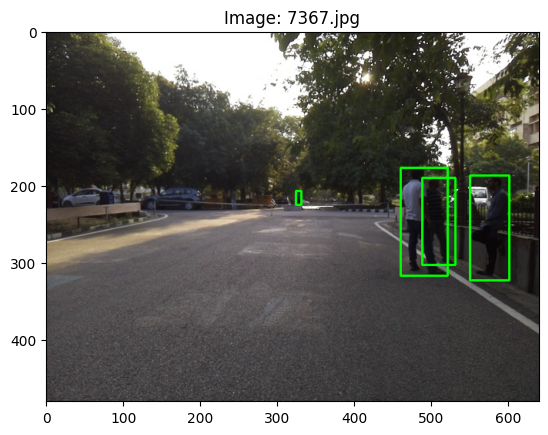

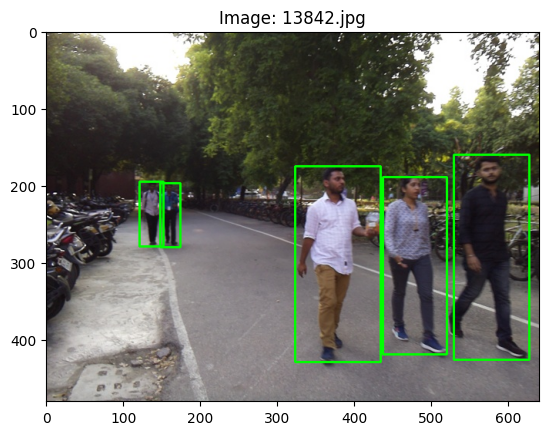

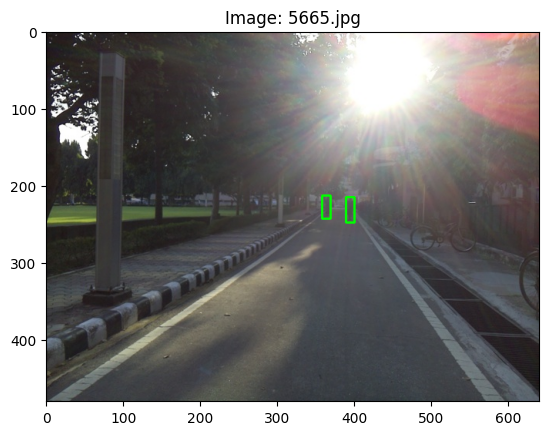

In [ ]:
import random
random_images = random.sample(data['images'], 4)

# Iterate through the randomly selected images
for image in random_images:
    image_id = image['id']
    image_path = os.path.join(image_folder, image['file_name'])
    img = cv2.imread(image_path)

    for annotation in data['annotations']:
        if annotation['image_id'] == image_id:
            x, y, w, h = annotation['bbox']
            cv2.rectangle(img, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 0), 2)

    # Display the image with bounding boxes
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Image: {image['file_name']}")
    plt.show()

In [ ]:
!git clone https://github.com/IDEA-Research/DINO.git

Cloning into 'DINO'...
remote: Enumerating objects: 442, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 442 (delta 136), reused 95 (delta 95), pack-reused 246 (from 1)
Receiving objects: 100% (442/442), 13.43 MiB | 19.18 MiB/s, done.
Resolving deltas: 100% (191/191), done.


In [ ]:
cd DINO

/content/DINO


In [ ]:
!pip install -r requirements.txt

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-install-etkmkopr/pycocotools_6581d39127c84feabffb2971b230b384
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-install-etkmkopr/pycocotools_6581d39127c84feabffb2971b230b384
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-install-etkmkopr/panopticapi_85b4d4d687d7412eb160d643cbb3f8e3
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/panopticapi.git /tmp/pip-install-etkmkopr/panopticapi_85b4d4d687d7412eb160d643cbb3f8e3
  Resolved https://github.com/cocodataset/panopticapi.git to commit 7bb4655548f98f3fedc07bf37e9040a992b054b0
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
cd models/dino/ops

/content/DINO/models/dino/ops


In [ ]:
!python setup.py build install

running build
running build_py
creating build
creating build/lib.linux-x86_64-cpython-310
creating build/lib.linux-x86_64-cpython-310/functions
copying functions/__init__.py -> build/lib.linux-x86_64-cpython-310/functions
copying functions/ms_deform_attn_func.py -> build/lib.linux-x86_64-cpython-310/functions
creating build/lib.linux-x86_64-cpython-310/modules
copying modules/ms_deform_attn.py -> build/lib.linux-x86_64-cpython-310/modules
copying modules/__init__.py -> build/lib.linux-x86_64-cpython-310/modules
running build_ext
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:495: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:414: UserWarning: The detected CUDA version (12.2) has a minor version mismatch with the version that was used to compil

In [ ]:
!python test.py

* True check_forward_equal_with_pytorch_double: max_abs_err 8.67e-19 max_rel_err 2.35e-16
* True check_forward_equal_with_pytorch_float: max_abs_err 4.66e-10 max_rel_err 1.13e-07
* True check_gradient_numerical(D=30)
* True check_gradient_numerical(D=32)
* True check_gradient_numerical(D=64)
* True check_gradient_numerical(D=71)
* True check_gradient_numerical(D=1025)
Traceback (most recent call last):
  File "/content/DINO/models/dino/ops/test.py", line 86, in <module>
    check_gradient_numerical(channels, True, True, True)
  File "/content/DINO/models/dino/ops/test.py", line 76, in check_gradient_numerical
    gradok = gradcheck(func, (value.double(), shapes, level_start_index, sampling_locations.double(), attention_weights.double(), im2col_step))
  File "/usr/local/lib/python3.10/dist-packages/torch/autograd/gradcheck.py", line 2053, in gradcheck
    return _gradcheck_helper(**args)
  File "/usr/local/lib/python3.10/dist-packages/torch/autograd/gradcheck.py", line 2082, in _gradche

In [ ]:
import os
import sys

# Add the DINO repository directory to the Python path
DINO_DIR = "/content/drive/MyDrive/DINO" # Replace with your actual DINO directory path
sys.path.append(DINO_DIR)


In [ ]:
import torch
import json
import numpy as np

from main import build_model_main
from util.slconfig import SLConfig
from datasets import build_dataset
from util.visualizer import COCOVisualizer

In [ ]:
from util import box_ops

In [ ]:
model_config_path = "/content/drive/MyDrive/DINO/config/DINO/DINO_4scale.py" # change the path of the model config file
model_checkpoint_path = "/content/drive/MyDrive/checkpoint0033_4scale" # change the path of the model checkpoint
# See our Model Zoo section in README.md for more details about our pretrained models.

In [ ]:
args = SLConfig.fromfile(model_config_path)
args.device = 'cuda'
model, criterion, postprocessors = build_model_main(args)
checkpoint = torch.load(model_checkpoint_path, map_location='cpu')
model.load_state_dict(checkpoint['model'])
_ = model.eval()

ModuleNotFoundError: No module named 'MultiScaleDeformableAttention'